# Shor's algorithm for errors correction

## Simulating a Bit Flip Error

## Step 1. Map the problem

### Setup

In [7]:
# General
import numpy as np

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Plotting routines
from qiskit.visualization import plot_distribution


In [2]:
# Code to run on a simulator:
 
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
backend = FakeBrisbane()

### Create a circuit, simulating a bit flip error

In [3]:
# Create a new circuit with 9 qubits
qc= QuantumCircuit(9)

# simulate bit flip error
qc.x(0)

# Measure
qc.measure_all()

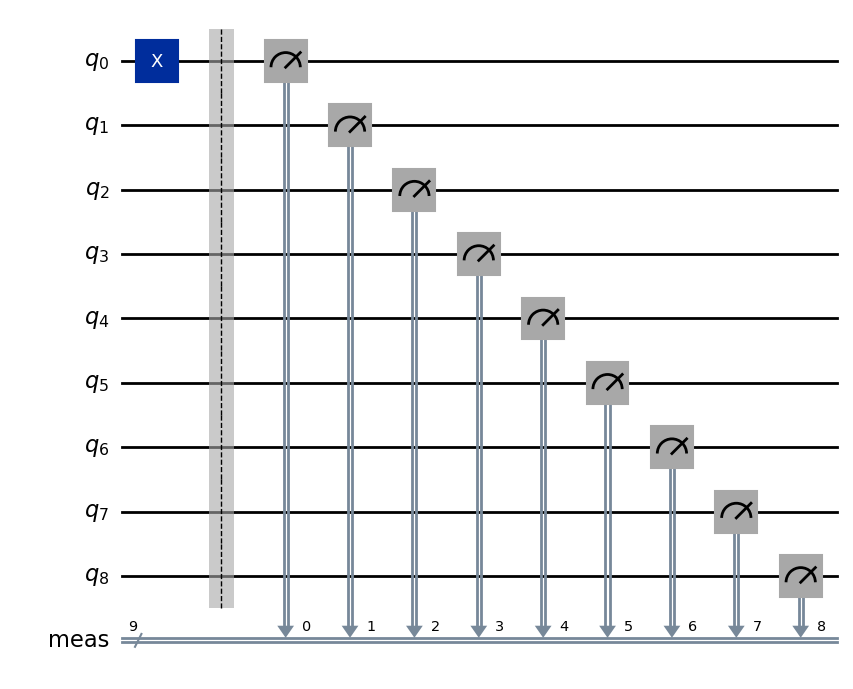

In [4]:
# Drawing the circuit
qc.draw("mpl")

## Step 2: Optimize the problem

### ISA circuit

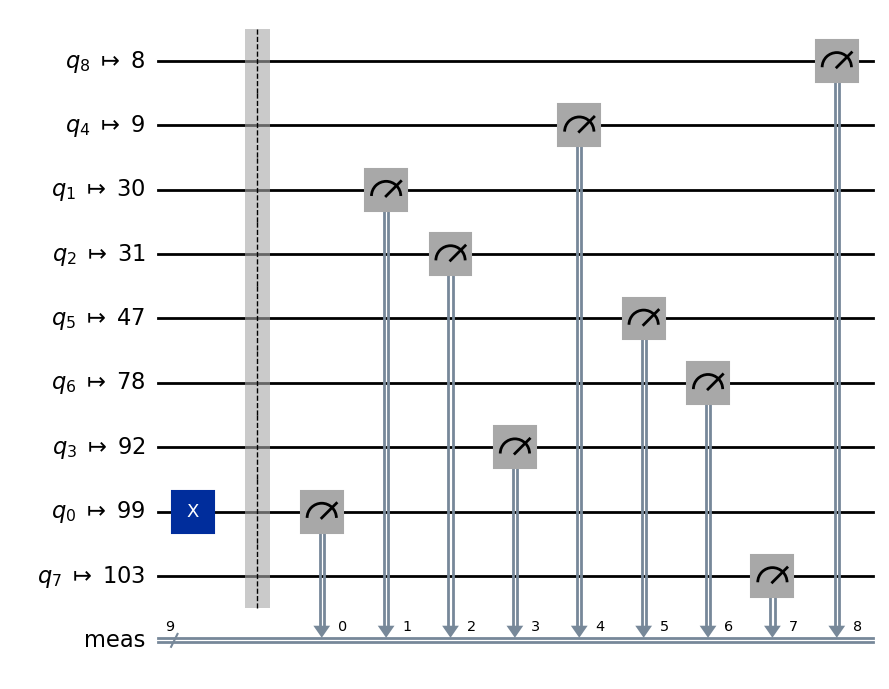

In [5]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

isa_circuit = pm.run(qc)
isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")

## Step 3. Execute using Qiskit primitives

In [8]:
# To run on local simulator:
#   1. Use the SatetvectorSampler from qiskit.primitives instead
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1_000
result = sampler.run([isa_circuit]).result()
dist = result[0].data.meas.get_counts()

## Step 4. Post-process, return result in classical format

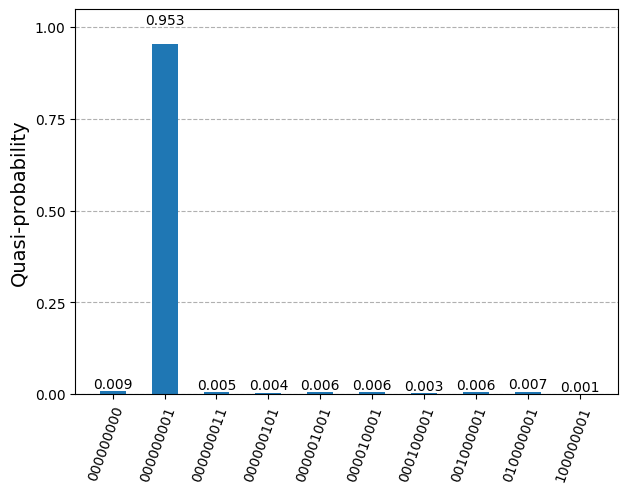

In [9]:
plot_distribution(dist)